In [3]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv('max_data/SixAirlinesDataV2.csv')
data=data.drop(columns='Unnamed: 0')

In [5]:
# 列数据
data

,Airline,Aircraft,FlightDuration,IsInternational,SeatsEconomy,SeatsPremium,PitchEconomy,PitchPremium,WidthEconomy,WidthPremium,PriceEconomy,PricePremium,PriceRelative,SeatsTotal,PitchDifference,WidthDifference,PercentPremiumSeats,month_num
0,0.089142,-0.693889,-0.817844,3.294215,-0.436182,-0.343385,1.220342,-2.215259,0.302148,-1.357472,-0.578401,-0.802415,0.06,-0.442612,-2.091811,-1.381970,0.009871,-1.639972
1,0.089142,-0.693889,-0.783876,3.294215,-1.029628,-1.147585,1.220342,-2.968588,-1.455802,-2.258698,-0.667926,-0.870953,0.07,-1.098823,-2.650559,-1.381970,-0.411592,-1.639972
2,0.648468,-0.693889,-1.199981,-0.303562,-0.554871,-1.878677,-1.818641,1.551387,-1.455802,1.346207,-1.010589,-1.018270,0.65,-0.794154,1.819422,1.912112,-2.053194,0.282340
3,0.089142,1.441153,-1.542489,3.294215,-1.108754,-1.147585,1.220342,-2.968588,-1.455802,-2.258698,-1.141274,-1.256183,0.09,-1.169131,-2.650559,-1.381970,-0.297797,0.282340
4,1.207793,-0.693889,-0.161134,-0.303562,-0.053740,-0.416494,1.220342,0.044729,-1.455802,-0.456246,1.630900,1.014233,0.07,-0.114507,-0.415569,0.265071,-0.457953,-0.678816
5,1.767118,1.441153,-0.350788,-0.303562,1.700221,0.168380,1.220342,0.044729,2.060098,0.444980,-0.792437,-0.607831,0.99,1.537737,-0.415569,-0.558450,-0.988998,-0.678816
6,0.648468,-0.693889,-1.364158,-0.303562,-0.554871,-1.878677,-1.818641,1.551387,-1.455802,1.346207,-1.135100,-1.159285,0.77,-0.794154,1.819422,1.912112,-2.053194,1.243496
7,-1.029508,1.441153,1.608018,-0.303562,1.304591,1.557454,-0.299150,0.044729,0.302148,-0.456246,0.496922,0.643183,0.47,1.408838,0.143179,-0.558450,0.191101,-0.678816
8,0.648468,-0.693889,-0.868795,-0.303562,-1.056003,-1.293804,-1.818641,1.551387,-1.455802,1.346207,-1.153622,-1.188433,0.74,-1.145695,1.819422,1.912112,-0.637075,1.243496
9,-0.470183,1.441153,0.170051,-0.303562,-0.251555,1.045690,-0.299150,0.044729,0.302148,1.346207,0.553518,1.065439,0.73,-0.055917,0.143179,1.088591,1.295336,0.282340


In [6]:
data.shape

(320, 18)

In [7]:
test_size = 0.3

In [8]:
# 根据不同标准选择变量
y = data[['PriceEconomy']].copy()
X = data.drop(columns = ['PriceEconomy']).copy()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
data_train, data_test = train_test_split(data, test_size=test_size)

In [10]:
data_train.to_csv('max_data/datanew_train.csv')
data_test.to_csv('max_data/datanew_test.csv')

###  读取训练数据

In [11]:
path = 'max_data/datanew_train.csv'
train = pd.read_csv(path, sep = ',', na_filter = False)
train = train.set_index('Unnamed: 0')

In [12]:
X_train = train.drop(columns = ['PriceEconomy']).copy()
y_train = train[['PriceEconomy']].copy()
len(X_train)

224

In [13]:
standarscaler = StandardScaler()
X_trained_scaled = standarscaler.fit_transform(X_train)
X_trained_scaled

array([[ 0.55360904, -0.70947565, -0.86065708, ...,  1.92087067,
        -0.56107423, -0.64849723],
       [ 1.10231889, -0.70947565,  0.10766746, ...,  0.27859956,
        -0.41415654,  0.30093662],
       [-1.0925205 , -0.70947565, -0.03390046, ..., -0.54253599,
        -0.24807568,  1.25037048],
       ...,
       [-0.54381065,  1.40949163, -0.13016664, ...,  1.09973512,
        -0.0096006 , -0.64849723],
       [-1.0925205 , -0.70947565, -1.002225  , ..., -0.54253599,
         2.26230041, -1.59793109],
       [-1.0925205 ,  1.40949163, -1.07300895, ..., -0.54253599,
         0.2757178 ,  1.25037048]])

In [14]:
X_trained_scaled = pd.DataFrame(X_trained_scaled, index=X_train.index, columns=X_train.columns.values)

###  读取测试数据

In [15]:
path = 'max_data/datanew_test.csv'
test = pd.read_csv(path, sep = ',', na_filter = False)
test = test.drop(columns = ['Unnamed: 0']).copy()

In [16]:
X_test = test.drop(columns = ['PriceEconomy']).copy()
y_test = test[['PriceEconomy']].copy()

In [17]:
X_test_scaled = standarscaler.transform(X_test)

In [18]:
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns.values)

### Feature selection

In [19]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [20]:
# features = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
features = [15,16,17,18,19,20,21,22,23,24,25]
selected_features = []

# 使用向量机    内核选用线性
estimator = SVR(kernel="linear")

for i in features:
    # 选择特征的方式为 RFE 
    selector = RFE(estimator, i, step=1)
    sel_ = selector.fit(X_trained_scaled,np.ravel(y_train))
    selected_feat = X_trained_scaled.columns[sel_.get_support()]
    selected_features.append(selected_feat)


In [21]:
mse_results = {}

def get_random_forest(X_train, X_test, y_train, y_test):
    
#     返回一个元组，其中包含训练和测试集中的模型错误

    rf = RandomForestRegressor(n_estimators=200, random_state=39, max_depth=4, n_jobs=8)
    rf.fit(X_train, y_train)
    
    pred = rf.predict(X_train)
    
#     使用predict()函数得到上一节训练的随机森林模型在测试集合上的预测结
    train_mse = mean_squared_error(y_train,pred)
#     mse 均方误差
    
    pred = rf.predict(X_test)
    test_mse = mean_squared_error(y_test,pred)
    return train_mse, test_mse

In [22]:
# 评估使用所选功能构建的算法的性能

min_test_mse = 1000
features_of_min_test = None
for feat_list in selected_features:

    train_mse, test_mse = get_random_forest(X_trained_scaled[feat_list].fillna(0),
                                              X_test_scaled[feat_list].fillna(0),
                                              np.ravel(y_train), y_test)
    print("test_mse",test_mse)
    if test_mse < min_test_mse:
        min_test_mse = test_mse
        features_of_min_test = feat_list

print(f'Min test mse of {min_test_mse}')
print('Corresponding features list is: ', *features_of_min_test, sep=', ')   

test_mse 0.018635793444219926
test_mse 0.01880870851145688
test_mse 0.018971571263454386
test_mse 0.01897157126345439
test_mse 0.018971571263454393
test_mse 0.018971571263454386
test_mse 0.018971571263454386
test_mse 0.018971571263454383
test_mse 0.018971571263454393
test_mse 0.018971571263454393
test_mse 0.018971571263454393
Min test mse of 0.018635793444219926
Corresponding features list is: , Airline, Aircraft, FlightDuration, IsInternational, SeatsEconomy, SeatsPremium, PitchEconomy, PitchPremium, WidthEconomy, WidthPremium, PricePremium, PriceRelative, SeatsTotal, PitchDifference, PercentPremiumSeats


### 1. 相互信息 mutual information

In [23]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [24]:
# determine the mutual information  确定相互信息
mi = mutual_info_regression(X_train.fillna(0), np.ravel(y_train))
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)

PricePremium           2.127154
PriceRelative          1.173330
PercentPremiumSeats    1.087087
FlightDuration         1.029368
SeatsTotal             1.024734
SeatsEconomy           1.023378
SeatsPremium           0.981175
Airline                0.789851
PitchDifference        0.633789
WidthDifference        0.561640
PitchEconomy           0.508439
WidthEconomy           0.483200
WidthPremium           0.430170
PitchPremium           0.337505
Aircraft               0.192067
IsInternational        0.135123
month_num              0.000000
dtype: float64

In [25]:
mi.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [26]:
# here I will select the top 10 percentile
sel_ = SelectPercentile(mutual_info_regression, percentile=51).fit(X_train.fillna(0), np.ravel(y_train))
X_train.columns[sel_.get_support()]

Index(['Airline', 'FlightDuration', 'SeatsEconomy', 'SeatsPremium',
       'PricePremium', 'PriceRelative', 'SeatsTotal', 'PitchDifference',
       'PercentPremiumSeats'],
      dtype='object')

### 2. Univariate feature selection

In [27]:
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.metrics import r2_score, mean_squared_error

In [28]:
univariate = f_regression(X_train.fillna(0), np.ravel(y_train))
# f值越大，i号特征和因变量y之间的相关性就越大

# f值越大，那么特征对因变量 y 的预测能力就越强
univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False, inplace=True)

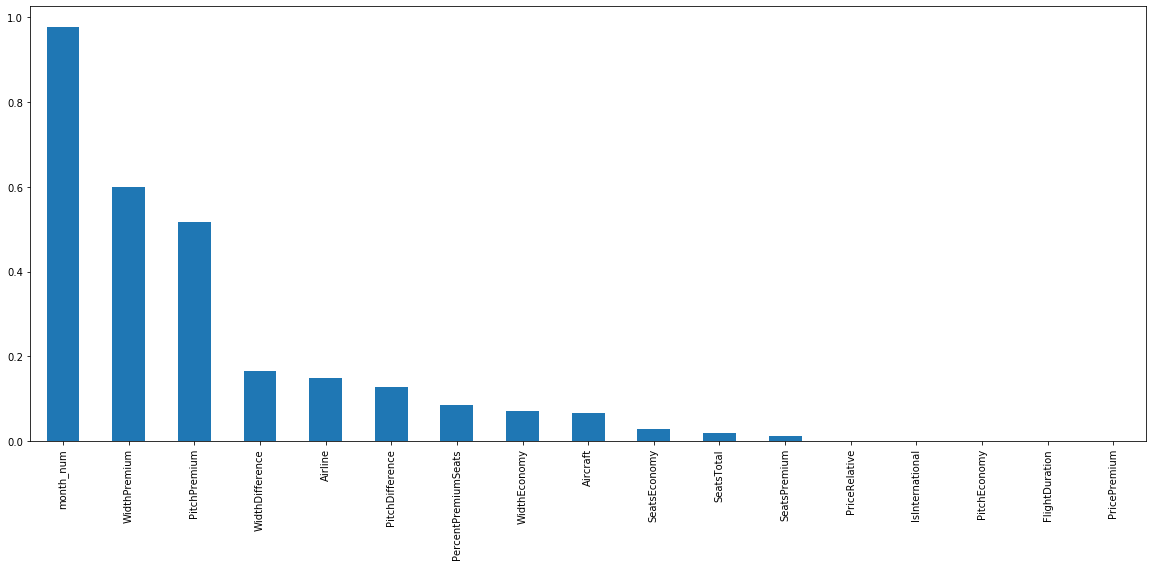

In [29]:
univariate.sort_values(ascending=False).plot.bar(figsize=(20,8))

# savefig('Figures/Univariate feature selection.png',bbox_inches='tight')


In [30]:
# here I will select the top 10 percentile
sel_ = SelectPercentile(f_regression, percentile=40).fit(X_train.fillna(0), np.ravel(y_train))
X_train.columns[sel_.get_support()]

Index(['FlightDuration', 'IsInternational', 'SeatsPremium', 'PitchEconomy',
       'PricePremium', 'PriceRelative', 'SeatsTotal'],
      dtype='object')

### 3. Step forward

In [31]:
from sklearn.ensemble import RandomForestRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import r2_score, mean_squared_error

In [32]:
# 查找并删除相关特性
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  4


In [2]:
# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

NameError: name 'X_train' is not defined

In [34]:
X_train.fillna(0, inplace=True)

In [1]:
X_train.shape[0]

NameError: name 'X_train' is not defined

In [35]:
# step forward feature selection

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# features = [15, 16,17,18, 19, 20, 21, 22]
features = [10,11,12,13]
selected_features= []
for i in features:

#     使用RandomForestRegressor做模拟器
    sfs1 = SFS(RandomForestRegressor(n_estimators = 100), 
           n_jobs = -1,
           k_features = i, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=5)

    sfs1 = sfs1.fit(np.array(X_train), np.ravel(y_train))
    selected_feat= X_train.columns[list(sfs1.k_feature_idx_)]
    selected_features.append(selected_feat)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    6.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    6.9s finished

[2019-11-26 16:59:19] Features: 1/10 -- score: 0.9295592022819781[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    6.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    6.8s finished

[2019-11-26 16:59:26] Features: 2/10 -- score: 0.9865159139883015[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    5.7s finished

[2019-11-26 16:59:32] Features: 3/10 -- score: 0.9869827978022185[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.5s finished

[2019-11-26 16:59:38] Features: 4/10 -- score: 0.98

[2019-11-26 17:03:14] Features: 11/12 -- score: 0.9828167982135824[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    3.7s finished

[2019-11-26 17:03:19] Features: 12/12 -- score: 0.9814771720033821[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    8.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    8.9s finished

[2019-11-26 17:03:28] Features: 1/13 -- score: 0.9312173834351418[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    7.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    7.9s finished

[2019-11-26 17:03:37] Features: 2/13 -- score: 0.9869236902467078[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   

In [36]:
sfs1.subsets_

{1: {'feature_idx': (9,),
  'cv_scores': array([0.94178929, 0.90917039, 0.92820568, 0.92733521, 0.94958635]),
  'avg_score': 0.9312173834351418,
  'feature_names': ('9',)},
 2: {'feature_idx': (9, 10),
  'cv_scores': array([0.96148232, 0.98821286, 0.9937318 , 0.99897818, 0.99221329]),
  'avg_score': 0.9869236902467078,
  'feature_names': ('9', '10')},
 3: {'feature_idx': (1, 9, 10),
  'cv_scores': array([0.96396331, 0.98624004, 0.99325999, 0.99887653, 0.99166418]),
  'avg_score': 0.9868008101377646,
  'feature_names': ('1', '9', '10')},
 4: {'feature_idx': (1, 8, 9, 10),
  'cv_scores': array([0.96246745, 0.98824018, 0.99192282, 0.9988603 , 0.99061136]),
  'avg_score': 0.986420421743621,
  'feature_names': ('1', '8', '9', '10')},
 5: {'feature_idx': (1, 3, 8, 9, 10),
  'cv_scores': array([0.96220573, 0.98663774, 0.99142834, 0.99905064, 0.9906626 ]),
  'avg_score': 0.985997008989959,
  'feature_names': ('1', '3', '8', '9', '10')},
 6: {'feature_idx': (1, 3, 7, 8, 9, 10),
  'cv_scores': a

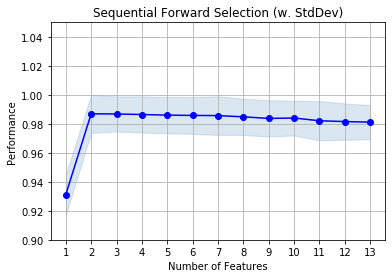

In [50]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')

plt.ylim([0.9,1.05])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.savefig('Figures/Sequential Forward Selection(RandomForest).png',dpi=1000,bbox_inches='tight')
plt.show()

In [38]:
# step forward feature selection
# 使用Regression做模拟器
from sklearn.linear_model import LinearRegression
features = [10,11,12,13]
selected_features= []
for i in features:#     使用LinearRegression做模拟器
    sfs2 = SFS(LinearRegression(),
               n_jobs = -1,
               k_features = i, 
               forward=True, 
               floating=False, 
               verbose=2,
               scoring='r2',
               cv=5)

    sfs2 = sfs2.fit(np.array(X_train), np.ravel(y_train))
    selected_feat= X_train.columns[list(sfs2.k_feature_idx_)]
    selected_features.append(selected_feat)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    3.4s finished

[2019-11-26 17:05:03] Features: 1/10 -- score: 0.8044830088919476[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    3.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    4.0s finished

[2019-11-26 17:05:07] Features: 2/10 -- score: 0.910067953320624[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    3.1s finished

[2019-11-26 17:05:10] Features: 3/10 -- score: 0.9326649205854786[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.0s finished

[2019-11-26 17:05:15] Features: 4/10 -- score: 0.942

[2019-11-26 17:07:11] Features: 11/12 -- score: 0.9572406387457713[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    3.4s finished

[2019-11-26 17:07:15] Features: 12/12 -- score: 0.9577861088840587[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    3.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    3.8s finished

[2019-11-26 17:07:19] Features: 1/13 -- score: 0.8044830088919476[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    3.1s finished

[2019-11-26 17:07:22] Features: 2/13 -- score: 0.910067953320624[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    

In [39]:
sfs2.subsets_

{1: {'feature_idx': (9,),
  'cv_scores': array([0.74043845, 0.85191351, 0.7932634 , 0.84210097, 0.79469871]),
  'avg_score': 0.8044830088919476,
  'feature_names': ('9',)},
 2: {'feature_idx': (9, 10),
  'cv_scores': array([0.8678348 , 0.93845832, 0.90098125, 0.92051439, 0.922551  ]),
  'avg_score': 0.910067953320624,
  'feature_names': ('9', '10')},
 3: {'feature_idx': (0, 9, 10),
  'cv_scores': array([0.90561264, 0.95643111, 0.91898357, 0.95123341, 0.93106386]),
  'avg_score': 0.9326649205854786,
  'feature_names': ('0', '9', '10')},
 4: {'feature_idx': (0, 7, 9, 10),
  'cv_scores': array([0.91064824, 0.96188433, 0.93749538, 0.95972611, 0.94058769]),
  'avg_score': 0.9420683496649659,
  'feature_names': ('0', '7', '9', '10')},
 5: {'feature_idx': (0, 3, 7, 9, 10),
  'cv_scores': array([0.9345481 , 0.96885465, 0.96022883, 0.97595701, 0.93763862]),
  'avg_score': 0.9554454419128053,
  'feature_names': ('0', '3', '7', '9', '10')},
 6: {'feature_idx': (0, 3, 7, 8, 9, 10),
  'cv_scores': 

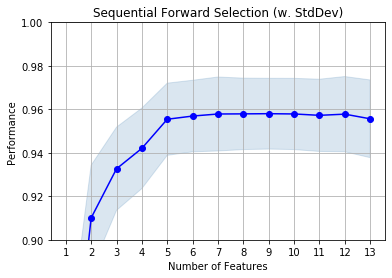

In [51]:
fig2 = plot_sfs(sfs2.get_metric_dict(), kind='std_dev')

plt.ylim([0.9,1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.savefig('Figures/Sequential Forward Selection(LinearRegression).png',dpi=1000,bbox_inches='tight')
plt.show()

In [41]:
# evaluate performance of algorithm built using selected features

min_test_mse = 1000
features_of_min_test = None
for feat_list in selected_features:
    train_mse, test_mse = get_random_forest(X_trained_scaled[feat_list].fillna(0),
                                              X_test_scaled[feat_list].fillna(0),
                                              np.ravel(y_train), y_test)
    if test_mse < min_test_mse:
        min_test_mse = test_mse
        features_of_min_test = feat_list

print(f'均方误差  {min_test_mse}')
print('Corresponding features list is: ', *features_of_min_test, sep=', ') 

Min test mse of 0.017674323669659372
Corresponding features list is: , Airline, Aircraft, FlightDuration, IsInternational, SeatsEconomy, WidthEconomy, WidthPremium, PricePremium, PriceRelative, month_num


### Step backward feature selection

In [42]:
# step backward greedy selection algorithm

# features = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
# features = [10,11,12,13]
features = [1,2,3,4,5]
selected_features= []
for i in features:
    sfs3 = SFS(RandomForestRegressor(n_estimators = 100), 
           n_jobs = -1,
           k_features=i, 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=5)

    sfs3 = sfs3.fit(np.array(X_train), np.ravel(y_train))
    selected_feat= X_train.columns[list(sfs1.k_feature_idx_)]
    selected_features.append(selected_feat)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:   11.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:   11.0s finished

[2019-11-26 17:08:19] Features: 12/1 -- score: 0.9816552378878237[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    9.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    9.4s finished

[2019-11-26 17:08:28] Features: 11/1 -- score: 0.9823719813032727[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    9.9s finished

[2019-11-26 17:08:38] Features: 10/1 -- score: 0.9834705946727833[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    9.1s finished

[2019-11-26 17:08:48] Features: 9/1 -- score: 0.984

In [93]:
X_train

,Airline,Aircraft,FlightDuration,IsInternational,SeatsEconomy,SeatsPremium,PitchEconomy,WidthEconomy,WidthPremium,PricePremium,PriceRelative,PercentPremiumSeats,month_num
Unnamed: 0,,,,,,,,,,,,,
179,0.648468,-0.693889,-0.868795,-0.303562,-1.056003,-1.293804,-1.818641,-1.455802,1.346207,-1.188433,0.74,-0.637075,-0.678816
162,1.207793,-0.693889,0.099285,-0.303562,-0.396619,-0.708930,1.220342,-1.455802,-0.456246,1.220634,0.03,-0.491670,0.282340
291,-1.029508,-0.693889,-0.042247,-0.303562,0.513330,0.168380,-0.299150,0.302148,-0.456246,0.395816,0.40,-0.327300,1.243496
104,-1.029508,-0.693889,0.382349,-0.303562,-1.082378,0.460816,-0.299150,0.302148,-0.456246,0.242985,0.33,2.157229,1.243496
223,1.207793,-0.693889,0.028519,-0.303562,-0.053740,-0.416494,1.220342,-1.455802,-0.456246,0.792076,0.08,-0.457953,1.243496
103,0.648468,-0.693889,-1.364158,-0.303562,-0.554871,-1.878677,-1.818641,-1.455802,1.346207,-1.159285,0.77,-2.053194,-0.678816
231,1.207793,-0.693889,0.121930,-0.303562,-0.396619,-0.708930,1.220342,-1.455802,-0.456246,1.220634,0.03,-0.491670,1.243496
286,1.767118,-0.693889,1.514607,-0.303562,-0.264743,-0.416494,1.220342,2.060098,0.444980,-0.166667,0.09,-0.261973,0.282340
58,-0.470183,1.441153,-0.138489,-0.303562,0.381453,0.314598,-0.299150,0.302148,1.346207,0.950422,1.08,-0.091280,-1.639972


In [43]:
sfs3.subsets_

{13: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
  'cv_scores': array([0.95945346, 0.98044358, 0.98098354, 0.99817924, 0.97698558]),
  'avg_score': 0.9792090776331028,
  'feature_names': ('0',
   '1',
   '2',
   '3',
   '4',
   '5',
   '6',
   '7',
   '8',
   '9',
   '10',
   '11',
   '12')},
 12: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11),
  'cv_scores': array([0.96156753, 0.98491156, 0.9850301 , 0.99820574, 0.97667427]),
  'avg_score': 0.9812778409273963,
  'feature_names': ('0',
   '1',
   '2',
   '3',
   '4',
   '5',
   '6',
   '7',
   '8',
   '9',
   '10',
   '11')},
 11: {'feature_idx': (0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11),
  'cv_scores': array([0.96114451, 0.98789191, 0.98724183, 0.998366  , 0.97679904]),
  'avg_score': 0.9822886596234838,
  'feature_names': ('0', '1', '3', '4', '5', '6', '7', '8', '9', '10', '11')},
 10: {'feature_idx': (1, 3, 4, 5, 6, 7, 8, 9, 10, 11),
  'cv_scores': array([0.96519988, 0.98811865, 0.98617529, 0.99808947, 0.9822387 ])

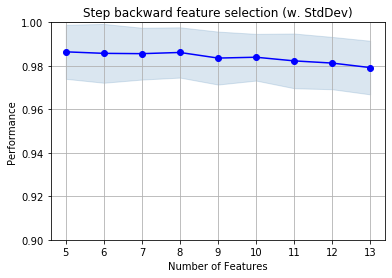

In [52]:
fig3 = plot_sfs(sfs3.get_metric_dict(), kind='std_dev')

plt.ylim([0.9,1])
plt.title('Step backward feature selection (w. StdDev)')
plt.grid()
plt.savefig('Figures/Sequential Backword Selection(RandomForest).png',dpi=1000,bbox_inches='tight')
plt.show()

In [45]:
# evaluate performance of algorithm built using selected features

min_test_mse = 1000
features_of_min_test = None
for feat_list in selected_features:
    train_mse, test_mse = get_random_forest(X_trained_scaled[feat_list].fillna(0),
                                              X_test_scaled[feat_list].fillna(0),
                                              np.ravel(y_train), y_test)
    if test_mse < min_test_mse:
        min_test_mse = test_mse
        features_of_min_test = feat_list

print(f'均方误差 {min_test_mse}')
print('Corresponding features list is: ', *features_of_min_test, sep=', ') 

Min test mse of 0.019178043745573626
Corresponding features list is: , Airline, Aircraft, FlightDuration, IsInternational, SeatsEconomy, SeatsPremium, PitchEconomy, WidthEconomy, WidthPremium, PricePremium, PriceRelative, PercentPremiumSeats, month_num


### 5. Exhaustive feature selection

In [46]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [47]:
# exhaustive search

# in order to shorter search time for the demonstration
# i will ask the algorithm to try all possible 1,2,3 and 4
# feature combinations from a dataset of 4 features

# if you have access to a multicore or distributed computer
# system you can try more greedy searches

efs1 = EFS(RandomForestRegressor(n_jobs=-1,n_estimators = 100), 
           min_features=1,
           max_features=5, 
           scoring='r2',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(np.array(X_train[X_train.columns[0:5]]), np.ravel(y_train))
           

Features: 31/31

In [48]:
efs1.subsets_

{0: {'feature_idx': (0,),
  'cv_scores': array([0.57510725, 0.56614219, 0.50442884, 0.70444813, 0.53935303]),
  'avg_score': 0.5778958872322303,
  'feature_names': ('0',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([-0.01028085,  0.01625499,  0.00641792,  0.01160765,  0.01459956]),
  'avg_score': 0.0077198539985888995,
  'feature_names': ('1',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.43142429, 0.5713843 , 0.57579634, 0.50740322, 0.50313536]),
  'avg_score': 0.5178286983531114,
  'feature_names': ('2',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([0.07756986, 0.06999148, 0.15152859, 0.07684172, 0.01956764]),
  'avg_score': 0.07909985653358535,
  'feature_names': ('3',)},
 4: {'feature_idx': (4,),
  'cv_scores': array([0.48181756, 0.61049189, 0.76363637, 0.71065222, 0.63852671]),
  'avg_score': 0.6410249514592188,
  'feature_names': ('4',)},
 5: {'feature_idx': (0, 1),
  'cv_scores': array([0.57036911, 0.56966574, 0.54455435, 0.76698934, 0.47807558]),
  'avg_score':

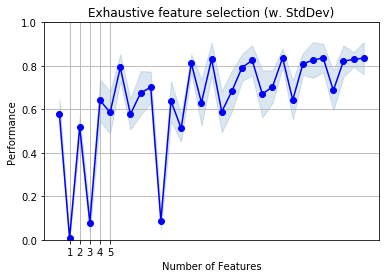

In [49]:
fig4 = plot_sfs(efs1.get_metric_dict(), kind='std_dev')

plt.ylim([0,1])
plt.title('Exhaustive feature selection (w. StdDev)')
plt.grid()
plt.savefig('Figures/Exhaustive Feature Selection(RandomForest).png',dpi=1000,bbox_inches='tight')
plt.show()

In [91]:
selected_feat= X_train.columns[list(sfs1.k_feature_idx_)]
selected_feat

Index(['Airline', 'Aircraft', 'FlightDuration', 'IsInternational',
       'SeatsEconomy', 'SeatsPremium', 'PitchEconomy', 'WidthEconomy',
       'WidthPremium', 'PricePremium', 'PriceRelative', 'PercentPremiumSeats',
       'month_num'],
      dtype='object')

### Lasso

In [53]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV

In [54]:
# here, again I will train a Lasso Linear regression and select
# the non zero features in one line.
# bear in mind that the linear regression object from sklearn does
# not allow for regularisation. So If you want to make a regularised
# linear regression you need to import specifically "Lasso"
# that is the l1 version of the linear regression
# alpha is the penalisation here, so I set it high in order
# to force the algorithm to shrink some coefficients

clf = LassoCV(cv=3)
sel_ = SelectFromModel(clf, threshold=0.000002)
sel_.fit(X_train.fillna(0), np.ravel(y_train))

SelectFromModel(estimator=LassoCV(alphas=None, copy_X=True, cv=3, eps=0.001,
                                  fit_intercept=True, max_iter=1000,
                                  n_alphas=100, n_jobs=None, normalize=False,
                                  positive=False, precompute='auto',
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, verbose=False),
                max_features=None, norm_order=1, prefit=False, threshold=2e-06)

In [55]:
sel_.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [56]:
# make a list with the selected features and print the outputs
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 13
selected features: 13
features with coefficients shrank to zero: 0


In [57]:
selected_feat

Index(['Airline', 'Aircraft', 'FlightDuration', 'IsInternational',
       'SeatsEconomy', 'SeatsPremium', 'PitchEconomy', 'WidthEconomy',
       'WidthPremium', 'PricePremium', 'PriceRelative', 'PercentPremiumSeats',
       'month_num'],
      dtype='object')

In [58]:
# evaluate performance of algorithm built using selected features

min_test_mse = 1000
features_of_min_test = None
train_mse, test_mse = get_random_forest(X_trained_scaled[selected_feat].fillna(0),
                                              X_test_scaled[selected_feat].fillna(0),
                                              np.ravel(y_train), y_test)
if test_mse < min_test_mse:
    min_test_mse = test_mse
    features_of_min_test = feat_list

print(f'均方误差 {min_test_mse}')
print('Corresponding features list is: ', *features_of_min_test, sep=', ') 

Min test mse of 0.019178043745573633
Corresponding features list is: , Airline, Aircraft, FlightDuration, IsInternational, SeatsEconomy, SeatsPremium, PitchEconomy, WidthEconomy, WidthPremium, PricePremium, PriceRelative, PercentPremiumSeats, month_num


### Lasso Lars

In [59]:
from sklearn.linear_model import LassoLarsCV

In [60]:
# here, again I will train a Lasso Linear regression and select
# the non zero features in one line.
# bear in mind that the linear regression object from sklearn does
# not allow for regularisation. So If you want to make a regularised
# linear regression you need to import specifically "Lasso"
# that is the l1 version of the linear regression
# alpha is the penalisation here, so I set it high in order
# to force the algorithm to shrink some coefficients

clf = LassoLarsCV(cv=5)
sel_ = SelectFromModel(clf, threshold=0.1)
sel_.fit(X_train.fillna(0), np.ravel(y_train))

SelectFromModel(estimator=LassoLarsCV(copy_X=True, cv=5,
                                      eps=2.220446049250313e-16,
                                      fit_intercept=True, max_iter=500,
                                      max_n_alphas=1000, n_jobs=None,
                                      normalize=True, positive=False,
                                      precompute='auto', verbose=False),
                max_features=None, norm_order=1, prefit=False, threshold=0.1)

In [61]:
sel_.get_support()

array([ True, False, False,  True, False, False, False,  True, False,
        True,  True, False, False])

In [62]:
# make a list with the selected features and print the outputs
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 13
selected features: 5
features with coefficients shrank to zero: 1


In [63]:
# evaluate performance of algorithm built using selected features

min_test_mse = 1000
features_of_min_test = None
train_mse, test_mse = get_random_forest(X_trained_scaled[selected_feat].fillna(0),
                                              X_test_scaled[selected_feat].fillna(0),
                                              np.ravel(y_train), y_test)
if test_mse < min_test_mse:
    min_test_mse = test_mse
    features_of_min_test = feat_list

print(f'均方误差 {min_test_mse}')
print('Corresponding features list is: ', *features_of_min_test, sep=', ')

Min test mse of 0.02202687007058511
Corresponding features list is: , Airline, Aircraft, FlightDuration, IsInternational, SeatsEconomy, SeatsPremium, PitchEconomy, WidthEconomy, WidthPremium, PricePremium, PriceRelative, PercentPremiumSeats, month_num


### Lars

In [64]:
from sklearn.linear_model import LarsCV

In [65]:
# here, again I will train a Lasso Linear regression and select
# the non zero features in one line.
# bear in mind that the linear regression object from sklearn does
# not allow for regularisation. So If you want to make a regularised
# linear regression you need to import specifically "Lasso"
# that is the l1 version of the linear regression
# alpha is the penalisation here, so I set it high in order
# to force the algorithm to shrink some coefficients

clf = LarsCV(cv=5)
sel_ = SelectFromModel(clf, threshold=0.1)
sel_.fit(X_train.fillna(0), np.ravel(y_train))

SelectFromModel(estimator=LarsCV(copy_X=True, cv=5, eps=2.220446049250313e-16,
                                 fit_intercept=True, max_iter=500,
                                 max_n_alphas=1000, n_jobs=None, normalize=True,
                                 positive=False, precompute='auto',
                                 verbose=False),
                max_features=None, norm_order=1, prefit=False, threshold=0.1)

In [66]:
sel_.get_support()

array([ True, False, False,  True, False, False, False,  True, False,
        True,  True, False, False])

In [67]:
# make a list with the selected features and print the outputs
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 13
selected features: 5
features with coefficients shrank to zero: 0


In [68]:
# evaluate performance of algorithm built using selected features

min_test_mse = 1000
features_of_min_test = None
train_mse, test_mse = get_random_forest(X_trained_scaled[selected_feat].fillna(0),
                                              X_test_scaled[selected_feat].fillna(0),
                                              np.ravel(y_train), y_test)
if test_mse < min_test_mse:
    min_test_mse = test_mse
    features_of_min_test = feat_list

print(f'均方误差  {min_test_mse}')
print('Corresponding features list is: ', *features_of_min_test, sep=', ') 

Min test mse of 0.022026870070585108
Corresponding features list is: , Airline, Aircraft, FlightDuration, IsInternational, SeatsEconomy, SeatsPremium, PitchEconomy, WidthEconomy, WidthPremium, PricePremium, PriceRelative, PercentPremiumSeats, month_num


### ElasticNetCV

In [69]:
from sklearn.linear_model import ElasticNetCV

In [70]:
# bear in mind that the linear regression object from sklearn does
# not allow for regularisation. So If you want to make a regularised
# linear regression you need to import specifically "Lasso"
# that is the l1 version of the linear regression
# alpha is the penalisation here, so I set it high in order
# to force the algorithm to shrink some coefficients

clf = ElasticNetCV(cv=5, l1_ratio=1.5)
sel_ = SelectFromModel(clf, threshold=0.0005)
sel_.fit(X_train.fillna(0), np.ravel(y_train))

SelectFromModel(estimator=ElasticNetCV(alphas=None, copy_X=True, cv=5,
                                       eps=0.001, fit_intercept=True,
                                       l1_ratio=1.5, max_iter=1000,
                                       n_alphas=100, n_jobs=None,
                                       normalize=False, positive=False,
                                       precompute='auto', random_state=None,
                                       selection='cyclic', tol=0.0001,
                                       verbose=0),
                max_features=None, norm_order=1, prefit=False,
                threshold=0.0005)

In [71]:
sel_.get_support()

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True])

In [72]:
# make a list with the selected features and print the outputs
selected_feat = X_train.columns[(sel_.get_support())]


print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 13
selected features: 12
features with coefficients shrank to zero: 1


In [73]:
# evaluate performance of algorithm built using selected features

min_test_mse = 1000
features_of_min_test = None
train_mse, test_mse = get_random_forest(X_trained_scaled[selected_feat].fillna(0),
                                              X_test_scaled[selected_feat].fillna(0),
                                              np.ravel(y_train), y_test)
if test_mse < min_test_mse:
    min_test_mse = test_mse
    features_of_min_test = feat_list

print(f'均方误差  {min_test_mse}')
print('Corresponding features list is: ', *features_of_min_test, sep=', ') 

Min test mse of 0.020577922708021588
Corresponding features list is: , Airline, Aircraft, FlightDuration, IsInternational, SeatsEconomy, SeatsPremium, PitchEconomy, WidthEconomy, WidthPremium, PricePremium, PriceRelative, PercentPremiumSeats, month_num


### Linear Regression coefficients

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
sel_ = SelectFromModel(LinearRegression())
sel_.fit(X_train.fillna(0), y_train)

SelectFromModel(estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                           n_jobs=None, normalize=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [76]:
# let's count the number of variables selected
selected_feat = X_train.columns[(sel_.get_support())]
len(selected_feat)

2

In [77]:
# and now, let's compare the  amount of selected features
# with the amount of features which coefficient is above the
# mean coefficient, to make sure we understand the output of
# sklearn

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients greater than the mean coefficient: {}'.format(
    np.sum(np.abs(sel_.estimator_.coef_) > np.abs(sel_.estimator_.coef_).mean())))

total features: 13
selected features: 2
features with coefficients greater than the mean coefficient: 2


In [78]:
# evaluate performance of algorithm built using selected features

min_test_mse = 1000
features_of_min_test = None
train_mse, test_mse = get_random_forest(X_trained_scaled[selected_feat].fillna(0),
                                              X_test_scaled[selected_feat].fillna(0),
                                              np.ravel(y_train), y_test)
if test_mse < min_test_mse:
    min_test_mse = test_mse
    features_of_min_test = feat_list

print(f'均方误差  {min_test_mse}')
print('Corresponding features list is: ', *features_of_min_test, sep=', ') 

Min test mse of 0.0221479243294907
Corresponding features list is: , Airline, Aircraft, FlightDuration, IsInternational, SeatsEconomy, SeatsPremium, PitchEconomy, WidthEconomy, WidthPremium, PricePremium, PriceRelative, PercentPremiumSeats, month_num


In [79]:
# here I will do the model fitting and feature selection
# altogether in one line of code

# first I specify the Random Forest instance, indicating
# the number of trees (the default value in sklearn is 10

# Then I use the selectFromModel object from sklearn
# to automatically select the features

# SelectFrom model will select those features which importance
# is greater than the mean importance of all the features
# by default, but you can alter this threshold if you want to

sel_ = SelectFromModel(RandomForestRegressor(n_estimators=100))
sel_.fit(X_train.fillna(0), np.ravel(y_train))

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                                max_depth=None,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=100, n_jobs=None,
                                                oob_score=False,
                                                random_state=None, verbose=0,
                                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, th

In [80]:
# let's make a list and count the selected features
selected_feat = X_train.columns[(sel_.get_support())]
len(selected_feat)

2

In [81]:
# and now, let's compare the  amount of selected features
# with the amount of features which importance is above the
# mean importance, to make sure we understand the output of
# sklearn

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients greater than the mean coefficient: {}'.format(
    np.sum(sel_.estimator_.feature_importances_ > sel_.estimator_.feature_importances_.mean())))

total features: 13
selected features: 2
features with coefficients greater than the mean coefficient: 2


In [82]:
# evaluate performance of algorithm built using selected features

min_test_mse = 1000
features_of_min_test = None
train_mse, test_mse = get_random_forest(X_trained_scaled[selected_feat].fillna(0),
                                              X_test_scaled[selected_feat].fillna(0),
                                              np.ravel(y_train), y_test)
if test_mse < min_test_mse:
    min_test_mse = test_mse
    features_of_min_test = feat_list

print(f'均方误差 {min_test_mse}')
print('Corresponding features list is: ', *features_of_min_test, sep=', ') 

Min test mse of 0.022147924329490698
Corresponding features list is: , Airline, Aircraft, FlightDuration, IsInternational, SeatsEconomy, SeatsPremium, PitchEconomy, WidthEconomy, WidthPremium, PricePremium, PriceRelative, PercentPremiumSeats, month_num


### Univariate mse

In [83]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

In [84]:
# loop to build a tree, make predictions and get the mse
# for each feature of the train set
mse_values = []
for feature in X_train.columns:
    clf = DecisionTreeRegressor()
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict(X_test[feature].fillna(0).to_frame())
    mse_values.append(mean_squared_error(y_test, y_scored))

In [85]:
# let's add the variable names and order it for clearer visualisation
mse_values = pd.Series(mse_values)
mse_values.index = X_train.columns
mse_values.sort_values(ascending=False)

Aircraft               1.071544
month_num              1.053410
WidthEconomy           1.027920
IsInternational        0.983740
WidthPremium           0.884656
PitchEconomy           0.829143
SeatsPremium           0.741208
SeatsEconomy           0.619062
Airline                0.539693
PriceRelative          0.506529
FlightDuration         0.446045
PercentPremiumSeats    0.438554
PricePremium           0.078162
dtype: float64

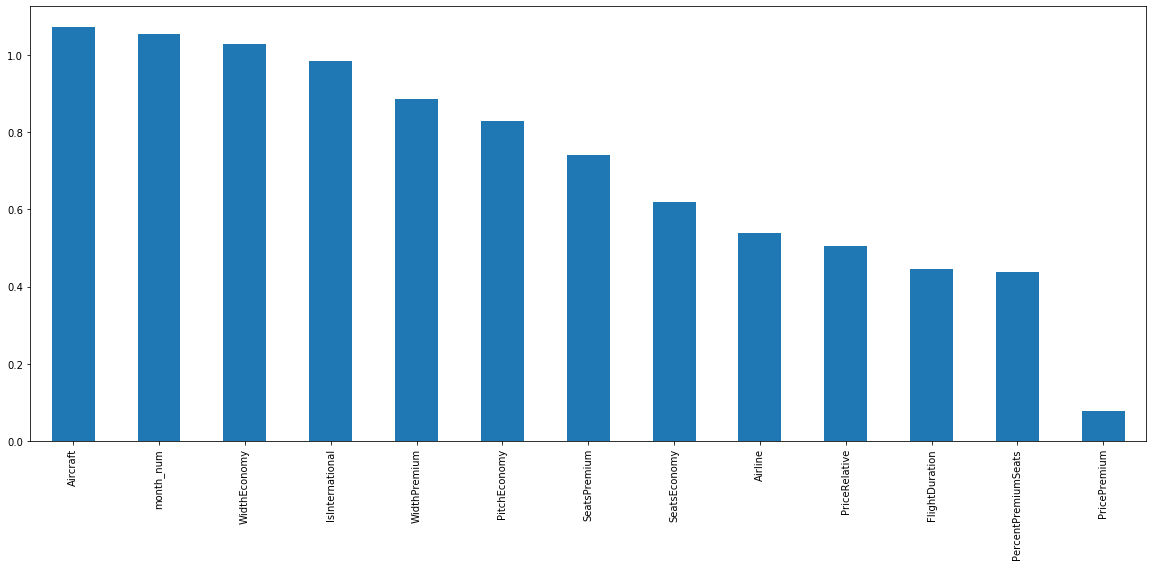

In [86]:
mse_values.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [87]:
# a roc auc value of 0.5 indicates random decision
# let's check how many features show a roc-auc value
# higher than random

len(mse_values[mse_values < 20])

13

# Modelos

## random forest

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
X_trained_scaled.head()

,Airline,Aircraft,FlightDuration,IsInternational,SeatsEconomy,SeatsPremium,PitchEconomy,PitchPremium,WidthEconomy,WidthPremium,PricePremium,PriceRelative,SeatsTotal,PitchDifference,WidthDifference,PercentPremiumSeats,month_num
Unnamed: 0,,,,,,,,,,,,,,,,,
179,0.553609,-0.709476,-0.860657,-0.321634,-1.044709,-1.199197,-1.830374,1.511331,-1.376155,1.317141,-1.196594,0.519386,-1.120533,1.795615,1.920871,-0.561074,-0.648497
162,1.102319,-0.709476,0.107667,-0.321634,-0.384732,-0.625069,1.119293,0.076847,-1.376155,-0.428655,1.253751,-1.024021,-0.442535,-0.349546,0.278600,-0.414157,0.300937
291,-1.092520,-0.709476,-0.033900,-0.321634,0.526038,0.236123,-0.355540,0.076847,0.281150,-0.428655,0.414800,-0.219710,0.504323,0.186744,-0.542536,-0.248076,1.250370
104,-1.092520,-0.709476,0.390803,-0.321634,-1.071108,0.523187,-0.355540,0.076847,0.281150,-0.428655,0.259350,-0.371877,-0.863361,0.186744,-0.542536,2.262300,1.250370
223,1.102319,-0.709476,0.036883,-0.321634,-0.041543,-0.338005,1.119293,0.076847,-1.376155,-0.428655,0.817849,-0.915331,-0.091847,-0.349546,0.278600,-0.380089,1.250370


In [96]:
X_pred0 = ['Airline','Aircraft','FlightDuration','IsInternational','SeatsEconomy','SeatsPremium','PitchEconomy','WidthEconomy','WidthPremium','PriceRelative','PricePremium','PercentPremiumSeats','month_num']
X_pred1 = ['Airline','Aircraft','FlightDuration','IsInternational','SeatsEconomy','SeatsPremium','PitchEconomy','WidthEconomy','WidthPremium','PriceRelative','PricePremium','PercentPremiumSeats']
X_pred2 = ['FlightDuration','IsInternational','SeatsEconomy','SeatsPremium','PitchEconomy','PriceRelative','PricePremium','month_num']
X_pred3 = ['FlightDuration','PricePremium','PriceRelative']

In [97]:
train_mse, test_mse = get_random_forest(X_trained_scaled[X_pred0].fillna(0),
                                              X_test_scaled[X_pred0].fillna(0),
                                              np.ravel(y_train), y_test)
print(f'train mse of {train_mse}')
print(f'test mse of {test_mse}')

train mse of 0.010861119483500773
test mse of 0.018994135681213813


In [98]:
train_mse, test_mse = get_random_forest(X_trained_scaled[X_pred1].fillna(0),
                                              X_test_scaled[X_pred1].fillna(0),
                                              np.ravel(y_train), y_test)
print(f'train mse of {train_mse}')
print(f'test mse of {test_mse}')

train mse of 0.010892710425177674
test mse of 0.018812833563227205


In [99]:
train_mse, test_mse = get_random_forest(X_trained_scaled[X_pred2].fillna(0),
                                              X_test_scaled[X_pred2].fillna(0),
                                              np.ravel(y_train), y_test)
print(f'train mse of {train_mse}')
print(f'test mse of {test_mse}')

train mse of 0.011107474677359366
test mse of 0.018882470165528145


In [208]:
train_mse, test_mse = get_random_forest(X_trained_scaled[X_pred3].fillna(0),
                                              X_test_scaled[X_pred3].fillna(0),
                                              np.ravel(y_train), y_test)
print(f'train mse of {train_mse}')
print(f'test mse of {test_mse}')

train mse of 1.3376531444666162
test mse of 1.1542867529226566
